In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from  sklearn.preprocessing  import StandardScaler

In [35]:
# read the dataset
train = pd.read_csv(r"F:\Dataset\Big Mart Sales\train.csv",encoding='utf-8')
test = pd.read_csv(r"F:\Dataset\Big Mart Sales\test.csv",encoding='utf-8')

In [32]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [29]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

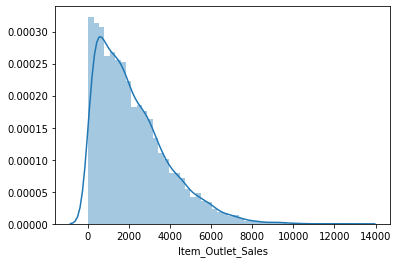

In [37]:
sns.distplot(train["Item_Outlet_Sales"])

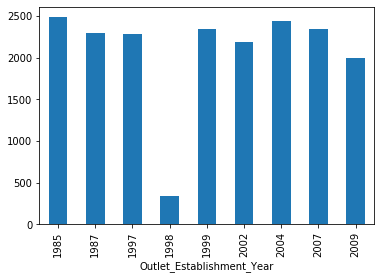

In [38]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

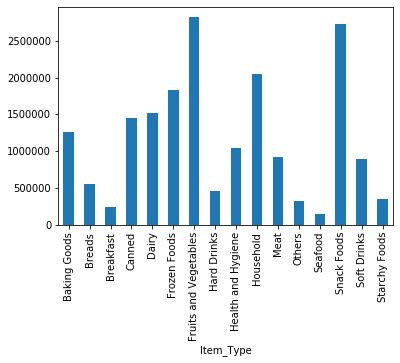

In [39]:
train.groupby('Item_Type')['Item_Outlet_Sales'].sum().plot.bar()

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


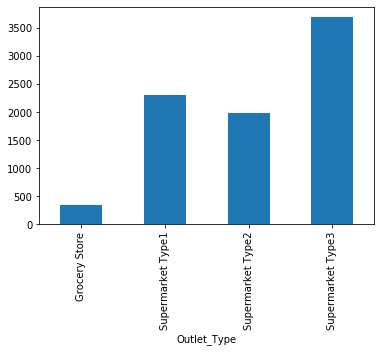

In [40]:
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()
train.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

In [42]:
train_id = train.Item_Identifier
test_id = test.Item_Identifier

y_train = train.Item_Outlet_Sales

In [44]:
train = train.drop(['Item_Outlet_Sales', "Item_Identifier"], axis = 1)
test = test.drop(["Item_Identifier"], axis = 1)

In [51]:
combined_data = pd.concat([train, test], ignore_index = True)

In [52]:
combined_data.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7460,18.600,Low Fat,0.076792,Snack Foods,161.0236,OUT013,1987,High,Tier 3,Supermarket Type1
2595,NaN,Low Fat,0.018632,Canned,82.9908,OUT019,1985,Small,Tier 1,Grocery Store
7122,9.800,Low Fat,0.013863,Soft Drinks,45.1060,OUT049,1999,Medium,Tier 1,Supermarket Type1
5590,16.700,LF,0.022156,Dairy,109.5886,OUT018,2009,Medium,Tier 3,Supermarket Type2
6999,6.135,Low Fat,0.115266,Soft Drinks,160.5236,OUT045,2002,NaN,Tier 2,Supermarket Type1


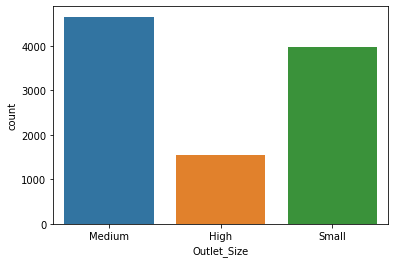

In [53]:
sns.countplot(x = "Outlet_Size", data = combined_data)

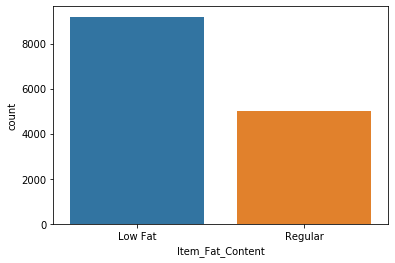

In [54]:
combined_data ["Outlet_Size"] = combined_data["Outlet_Size"].fillna((combined_data["Outlet_Size"].mode()[0] ))

combined_data["Item_Fat_Content"] = combined_data["Item_Fat_Content"].replace({"low fat" :"Low Fat","LF" :"Low Fat", "reg" : "Regular"})

sns.countplot(x="Item_Fat_Content", data= combined_data)

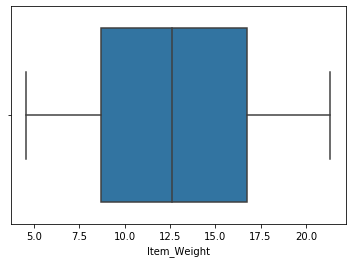

In [55]:
sns.boxplot(x = "Item_Weight", data = combined_data)

In [56]:
combined_data["Item_Weight"] = combined_data["Item_Weight"].fillna((combined_data["Item_Weight"].mean()))

combined_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [57]:
combined_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [58]:
combined_data = pd.get_dummies(combined_data, columns = ["Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Establishment_Year","Outlet_Size", "Outlet_Location_Type", "Outlet_Type" ], drop_first = True)
combined_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [60]:
X_train = combined_data[:len(train)]
X_test = combined_data[len(test):]

In [66]:
trainX, testX, trainY, testY = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0) 

slc= StandardScaler()
trainX = slc.fit_transform(trainX)
X_test = slc.transform(X_test)
testX = slc.transform(testX)

In [67]:
num_folds = 10
seed = 0
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits = num_folds, random_state = seed)

In [87]:
model = XGBRegressor(n_estimators = 200 , learning_rate = .5)
score_= cross_val_score(model, trainX, trainY, cv = kfold, scoring = scoring)
model.fit(trainX, trainY)
predictions = model.predict(testX)
model.score(trainX, trainY)

0.9686578792903701

In [75]:
print(r2_score(testY, predictions))
rmse = np.sqrt(mean_squared_error(testY, predictions))

0.42456255016087796
